# 기초 예제

## 이미지 입력
```
cv2.imread(
    fileName, # 파일 이름
    flags = cv2.IMREAD_COLOR # 입력된 파일을 어떻게 해석할지 결정
)
```



In [19]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2

src = cv2.imread('OpenCV_Logo.png', cv2.IMREAD_COLOR)
print(src.ndim, src.shape, src.dtype)

3 (739, 600, 3) uint8


## 이미지 출력
```
cv2.imshow(
    winname, # 윈도우 이름
    ndarray # 이미지 행렬
)
```

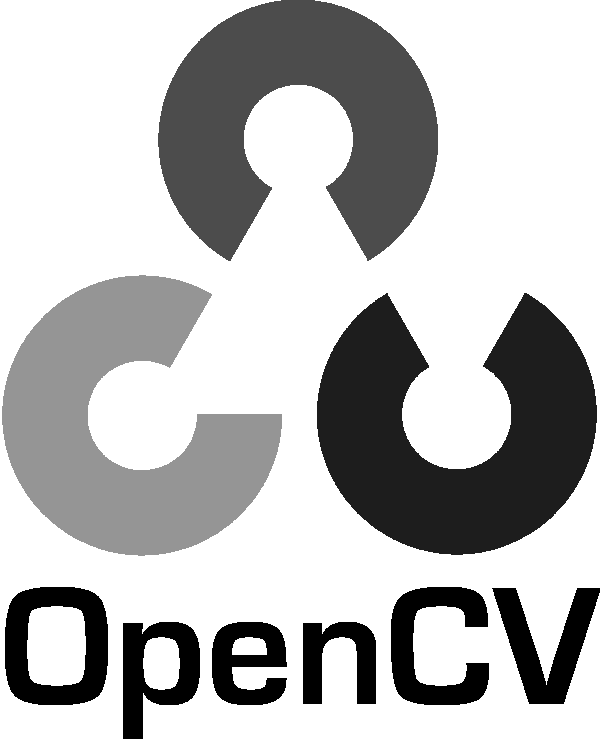

In [ ]:
# google colab에서 cv2.imshow() 하는 방법
from google.colab.patches import cv2_imshow

gray_scale = cv2.imread('OpenCV_Logo.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(gray_scale)

# 로컬 상에서만 가능한 함수
cv2.namedWindow('src', flags=cv2.WINDOW_FREERATIO)
cv2.resizeWindow('src', 400, 200)
cv2.imshow('src', gray_scale)
cv2.waitKey(0) # 0 이나 음수일 경우 특정 key가 누를때까지 대기
cv2.destroyWindow('src')

## 동영상 출력

In [ ]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

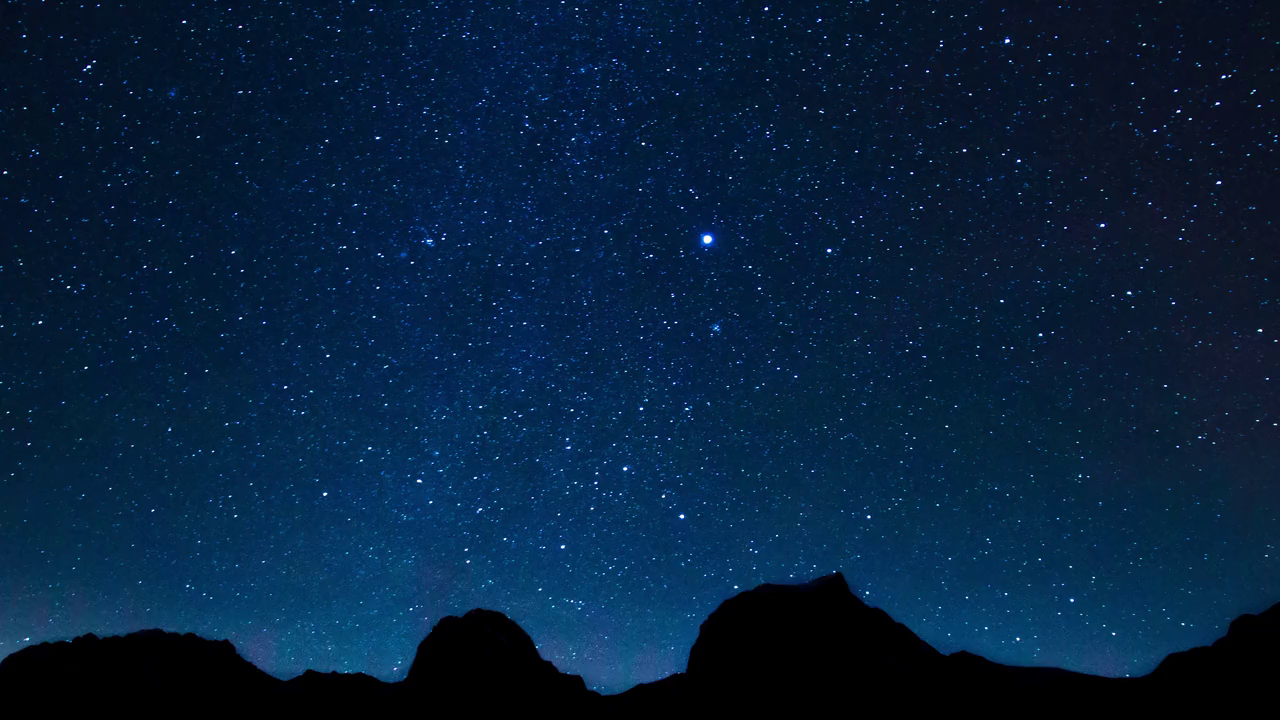

In [ ]:
import cv2

capture = cv2.VideoCapture('Star.mp4')

count = 0

while True:
    ret, frame = capture.read()

    # 현재 프레임 수와 전체 프레임 수 동일한지 여부 파악
    if (capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        capture.open('Star.mp4')

    cv2_imshow(frame)
    if cv2.waitKey(33) == ord('q'):
        break

    if count == 0:
        break

# 동영상 파일을 닫고 메모리 해제
capture.release()
cv2.destroyAllWindows()

colab에서 window를 띄울 수 없어서 cv2_imshow()로 진행

In [ ]:
# OpenCV가 아닌 다른 방법으로 동영상 재생하기
from IPython.display import HTML

mp4 = open('Star.mp4','rb').read() 
HTML(f"""
<video width=400 controls>
      <source src="{mp4}" type="video/mp4">
</video>
""")

Output hidden; open in https://colab.research.google.com to view.

## 카메라 출력


In [ ]:
capture = cv2.VideoCapture(0)
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 480)

count = 0

while True:
    ret, frame = capture.read()
    if ret == True:
        cv2_imshow(frame)
        if cv2.waitKey(33) == ord('q'):
            break
    else:
        break

    if count == 0:
        break

capture.release()
cv2.destroyAllWindows()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

google Colab 코드 스니펫에 존재하는 코드 사용

## 도형 그리기

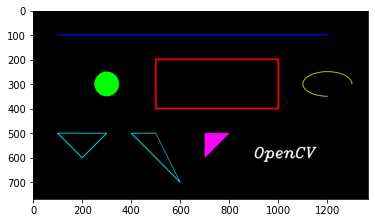

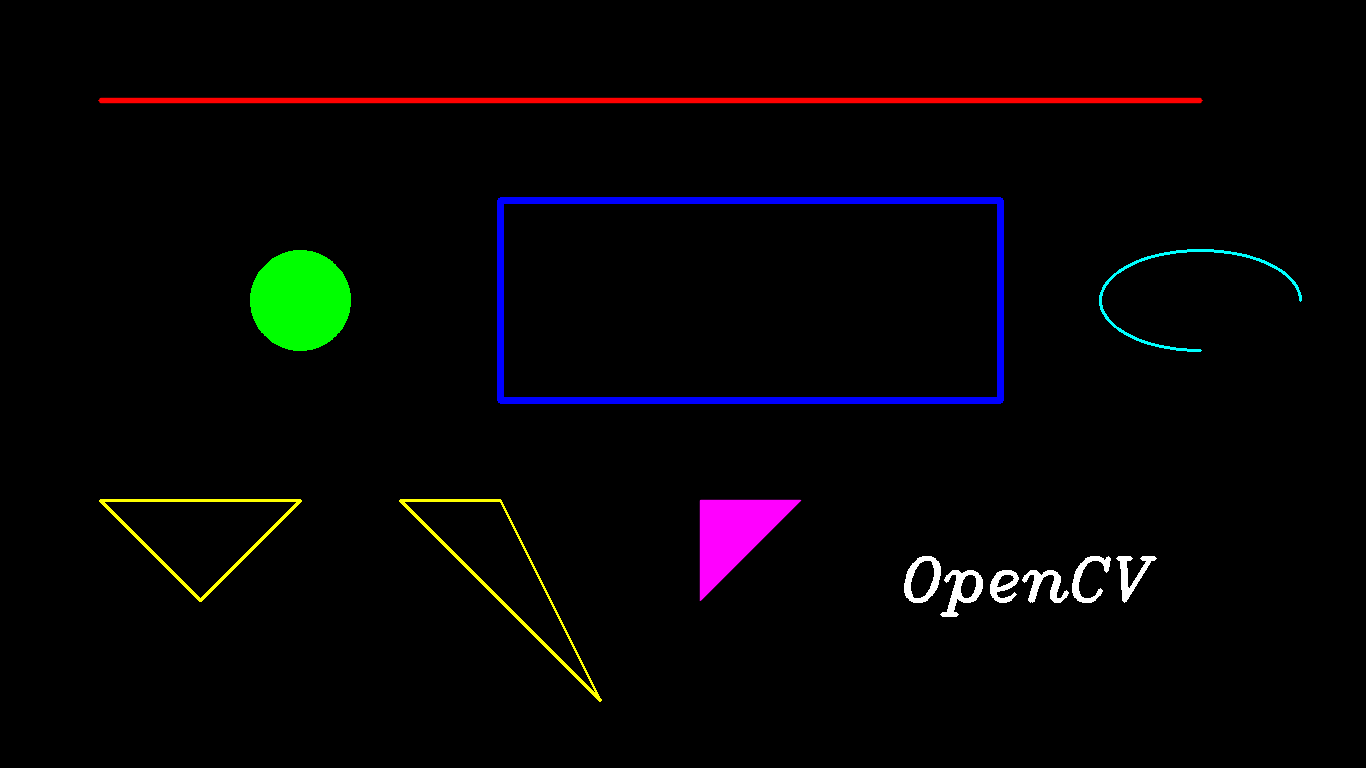

In [14]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = np.zeros((768, 1366, 3), dtype=np.uint8)

cv2.line(img, (100, 100), (1200, 100), (0, 0, 255), 3, cv2.LINE_AA)
cv2.circle(img, (300, 300), 50, (0, 255, 0), cv2.FILLED, cv2.LINE_4)
cv2.rectangle(img, (500, 200), (1000, 400), (255, 0, 0), 5, cv2.LINE_8)
cv2.ellipse(img, (1200, 300), (100, 50), 0, 90, 360, (255, 255, 0), 2)

pts1 = np.array([[[100, 500], [300, 500], [200, 600]], [[400, 500], [500, 500], [600, 700]]])
pts2 = np.array([[700, 500], [800, 500], [700, 600]])
cv2.polylines(img, pts1, True, (0, 255, 255), 2)
cv2.fillPoly(img, [pts2], (255, 0, 255), cv2.LINE_AA)

cv2.putText(img, 'OpenCV', (900, 600), cv2.FONT_HERSHEY_COMPLEX | cv2.FONT_ITALIC, 2, (255, 255, 255), 3)
plt.imshow(img)
plt.show()

cv2_imshow(img)

## 결과 저장

### 이미지 저장

In [15]:
save = cv2.imwrite("CV.jpeg", img, (cv2.IMWRITE_JPEG_QUALITY, 100, cv2.IMWRITE_JPEG_PROGRESSIVE, 1))
print(save)

True


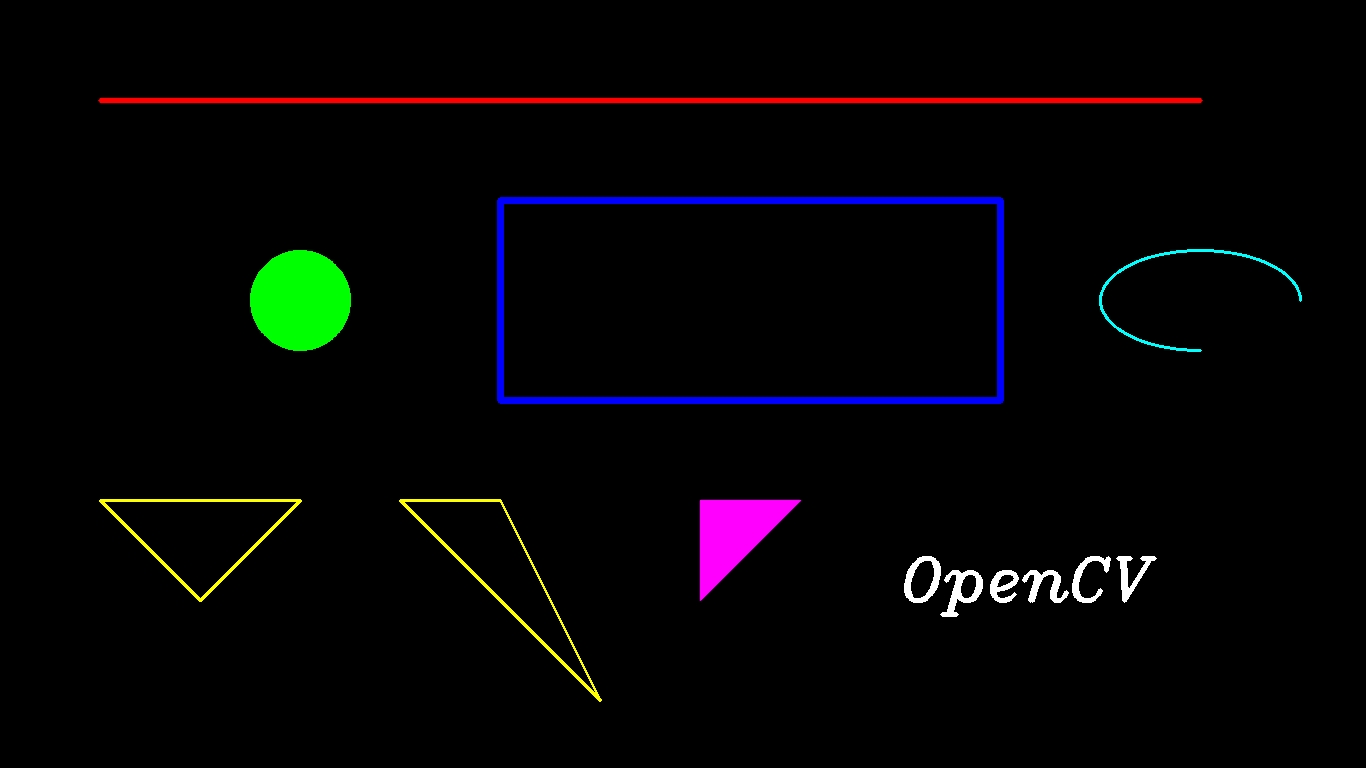

In [16]:
src = cv2.imread('CV.jpeg')
cv2_imshow(src)

### 동영상 저장


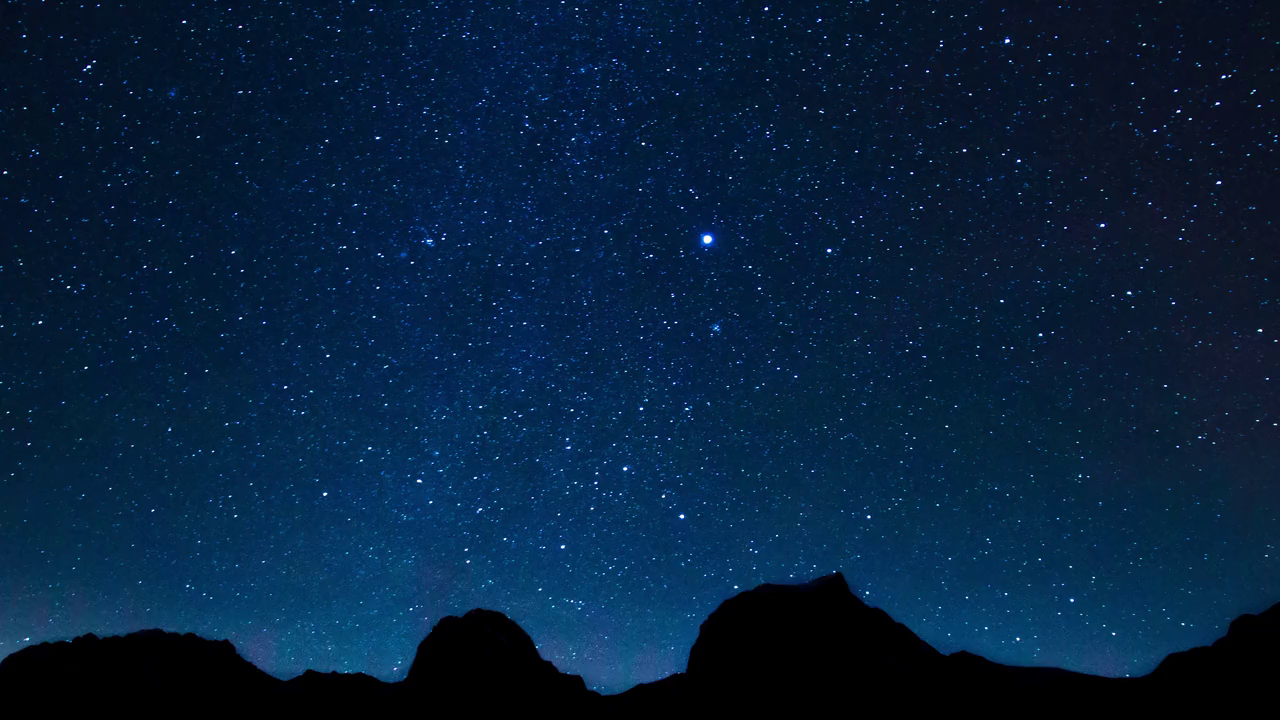

In [24]:
cap = cv2.VideoCapture('Star.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
videoWriter = cv2.VideoWriter()
isWrite = True

while True:
    ret, frame = cap.read()

    if cap.get(cv2.CAP_PROP_FRAME_COUNT) == cap.get(cv2.CAP_PROP_POS_FRAMES):
        cap.open('Star.mp4')
    
    cv2_imshow(frame)
    key = cv2.waitKey(33)

    if key == 4:
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        videoWriter.open('Video.avi', fourcc, 30, (width, height), True)
        isWrite = True

    elif key == 24:
        cideoWriter.release()
        isWrite = False

    elif key == ord('q'):
        break

    else:
        if isWrite:
            videoWriter.write(frame)
            break

videoWriter.release()
cap.release()
cv2.destroyAllWindows()

In [26]:
cap = cv2.VideoCapture('Video.avi')
print(cap)

<VideoCapture 0x7f9357c427f0>
